## Domaći zadaci iz predmeta Osnovi astronomije

<b>Autor</b>: Milica Vučić, 363/2020 <br>
<b>Asistent</b>: Nataša Pavlov

<i>Napomena:</i> sve formule, kao i propratni fajlovi, preuzeti su iz materijala za vežbe koji se mogu pronaći na [linku](https://drive.google.com/drive/folders/170WWwMOhtV-rs7gSc0QjDfmtPDg4kCx2).

### `Nebeska sfera i koordinatni sistemi `

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Odabrati jednu od dve konverzije koordinata: 
- `iz horizontskih u mesne ekvatorske`
- `iz mesnih ekvatorskih u horizontske`
   
Uz pomoć poznatih relacija napisati funkciju koja kao ulaz uzima poznate koordinate i transformiše ih u nove, uzimajući da je geografska širina takođe ulazni podatak. Kao izlaz treba da se dobije par transformisanih koordinata.

<mark style="background-color: lightgreen"><b><i>Rešenje:</i></b></mark>

   Odabrana konverzija je iz <i>horizontskih</i> u <i>mesne ekvatorske</i> koordinate. 
   Formule koje nam daju vezu između časovnog ugla, <i>H</i>, deklinacije <i>δ</i>, azimuta <i>A</i> i dometa <i>a</i> su: <br><br>
       $$ sin(δ) = {sina * sinφ + cosa * cosφ  * cosA}$$ <br>
       $$ cos(H) = {sina - sinφ * sinδ \over cosφ * cosδ} $$
       
   pri čemu je φ posmatračeva geografska širina.
   
   Funkcija koju kreiramo kao parametre prihvata posmatračevu `geografsku širinu`, `domet` i `azimut`, a na izlazu treba da nam vrati `časovni ugao` i `deklinaciju`. U kodu ispod, biće definisane pomoćne funkcije koje za ulogu imaju konvertovanje minuta i sekunda u stepene i obrnuto, kao i funkcije koje služe za formatiranje ispisa rezultata.
   
   
<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [1]:
import math
import datetime
import numpy as np

In [2]:
def minutes_and_seconds_to_degrees(data):
    result = data[0] + (data[1] / 60) + (data[2] / 3600)
    return round(result, 6)

In [3]:
def degrees_to_minutes_and_seconds(data):
    degrees = int(data)
    minutes = int(60 * (data - degrees))
    seconds = int((data - degrees - (minutes / 60)) * 3600.00)
    
    return [degrees, minutes, seconds]

In [4]:
# modul datetime radi sa sekundama, pa se u ovom slučaju sati konvertuju u sekunde

def hours_to_hms(data):
    seconds = data * 3600
    
    str_time = str(datetime.timedelta(seconds = seconds)) 
    
    return str_time.split(':')

In [5]:
def print_result(symbol, data):
    result = symbol + ' = '
    for val, sep in data:
        result += str(val) + sep + str(' ')
    
    print(result)

Azimut i domet biće reprezentovani u vidu liste koja ima sledeći oblik: 
```python3 
[deg, min, sec]
```

In [6]:
def horizon_to_equatorial_coordinates(phi, a, A):
    # python funkcije iz modula math rade sa radijanima, a ne stepenima, pa iz tog razloga vršimo konverziju
    
    a = math.radians(minutes_and_seconds_to_degrees(a))
    A = math.radians(minutes_and_seconds_to_degrees(A))
    phi = math.radians(phi)
    
    sin_delta = (math.sin(a) * math.sin(phi)) + (math.cos(a) * math.cos(phi) * math.cos(A))
    delta = math.asin(sin_delta)
    
    cos_H = (math.sin(a) - math.sin(phi) * math.sin(delta)) / (math.cos(phi) * math.cos(delta))
    H_p = math.degrees(math.acos(cos_H))
    
    H = H_p if math.sin(A) < 0 else (360 - H_p)
    
    delta = math.degrees(delta)
    H = H / 15
    
    return [degrees_to_minutes_and_seconds(delta), H]

Primer za testiranje prethodno napisanih funkcija je uzet iz PDF-a (`v3_konverzije`) sa [sajta]("https://drive.google.com/drive/folders/170WWwMOhtV-rs7gSc0QjDfmtPDg4kCx2">) u kojem je i opisan postupak konverzija iz jednog sistema u drugi.

In [7]:
[delta, H] = horizon_to_equatorial_coordinates(52.0, [19, 20, 3.64], [283, 16, 15.7])

In [8]:
formated_delta = list(zip(delta, ['h', 'º', '"']))
formated_H = list(zip(hours_to_hms(H), ['h', 'º', '"']))

print_result('δ', formated_delta)
print_result('H', formated_H)

δ = 23h 13º 9" 
H = 5h 51º 44.000345" 


<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark> 

Utvrditi za geografsku širinu φ proizvoljnog posmatrača na Zemlji da li je proizvoljna zvezda deklinacije δ:
- `cirkumpolarna`
- `anticirkumpolarna` ili 
- `izlazi i zalazi u toku 24h`. 

Napisati kod u kojem korisnik unosi tražene vrednosti geografske širine i deklinacije, a koji kao izlaz daje informaciju o cirkumpolarnosti. Voditi računa o tome koje vrednosti unosa su dozvoljene. Zvezde koje se nalaze na granici se mogu zasebno definisati, ali se mogu i obuhvatiti u jednom od slučajeva.

<mark style="background-color: lightgreen"><b><i>Rešenje:</i></b></mark>

Zadatak se može rešiti na dva načina. 
Jedan način podrazumeva da prvo ispitujemo geografsku širinu, a zatim detaljnije granamo na osnovu deklinacije, dok drugi to radi obratnim redosledom.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [9]:
def circumpolarity_latitude(latitude, declination, possible_results):
    
    if latitude > 0:
        if np.any(np.arange(90 - latitude, 91) == declination):
            return possible_results[0]
        elif np.any(np.arange(-90, -90 + latitude + 1) == declination):
            return possible_results[1]
        else:
            return possible_results[2]
    elif latitude < 0:
        if np.any(np.arange(90 + latitude, 91) == declination):
            return possible_results[0]
        elif np.any(np.arange(-90, -90 - latitude - 1) == declination):
            return possible_results[1]
        else:
            return possible_results[2]

In [10]:
possible_results = {0: 'Zvezda je cirkumpolarna', 1: 'Zvezda je anticirkumpolarna', 2: 'Zvezda nije ni cirkumpolarna ni anticirkumpolarna'}

latitude = float(input('Unesite vrednost geografske širine: '))
declination = float(input('Unesite vrednost deklinacije: '))

circumpolarity_latitude(latitude, declination, possible_results)

Unesite vrednost geografske širine: 32
Unesite vrednost deklinacije: 65


'Zvezda je cirkumpolarna'

### `Kretanje Sunca i vreme `

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Za posmatrača u Beogradu (44.8125º N, 20.4612º E) prikazati odstupanje gornje kulminacije pravog Sunca po lokalnom vremenu (minutima) u toku 2023. godine.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [11]:
def days_between(start, end):
    result = []
    
    for day in range(0, (end - start).days):
        result.append(start + datetime.timedelta(days= day))
    return result

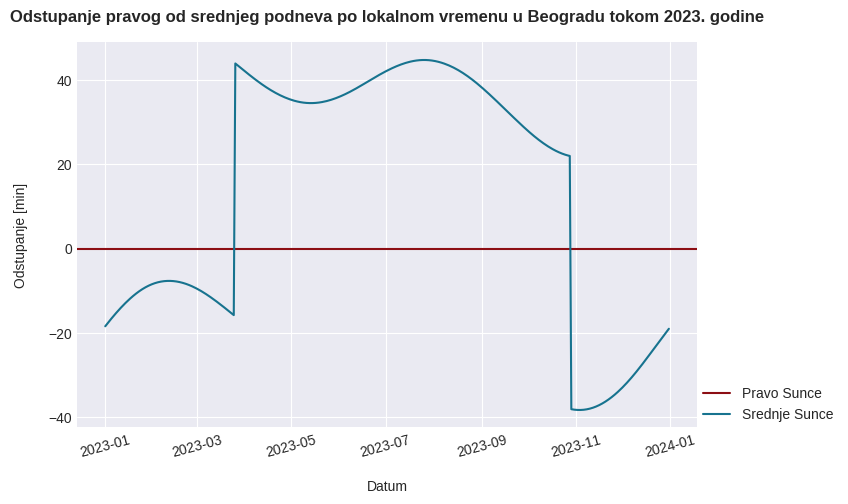

In [12]:
import ephem
import pandas as pd
import matplotlib.dates as mat_dates
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

BG = ephem.Observer()
BG.lat = "44.8125"
BG.lon = "20.4612"

sun = ephem.Sun()

start_date = datetime.datetime(2023, 1, 1, 0, 0)
end_date = start_date + datetime.timedelta(days= 365)

days = days_between(start_date, end_date)

data = []
for day in days:
    BG.date = day
    transit = ephem.localtime(BG.next_transit(sun))
    noon = day.replace(hour= 12)
    data.append((transit - noon).total_seconds() / 60)

plt.figure(figsize= (8, 5))
plt.axhline(y = 0, label= 'Pravo Sunce', color= '#8c0e14')
plt.plot(days, data, label= 'Srednje Sunce', color= '#17738f')

plt.legend(loc= (1, 0))
plt.title('Odstupanje pravog od srednjeg podneva po lokalnom vremenu u Beogradu tokom 2023. godine', pad= 15, fontweight= 'bold')
plt.xlabel('Datum', labelpad= 15)
plt.xticks(rotation= 15)
plt.ylabel('Odstupanje [min]', labelpad= 15)
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark> 

Za posmatrača u Beogradu prikazati trenutke zalaska Sunca u toku 2023. godine.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [13]:
def prepare_data():
    dates = pd.date_range(start= '2023-01-01', end= '2023-12-31')
    data = []
    
    for day in dates:
        BG.date = day
        transit = ephem.localtime(BG.next_setting(sun))
        delta = transit - day
        data.append(pd.to_datetime(delta.total_seconds() * 1e9))

    return data, dates

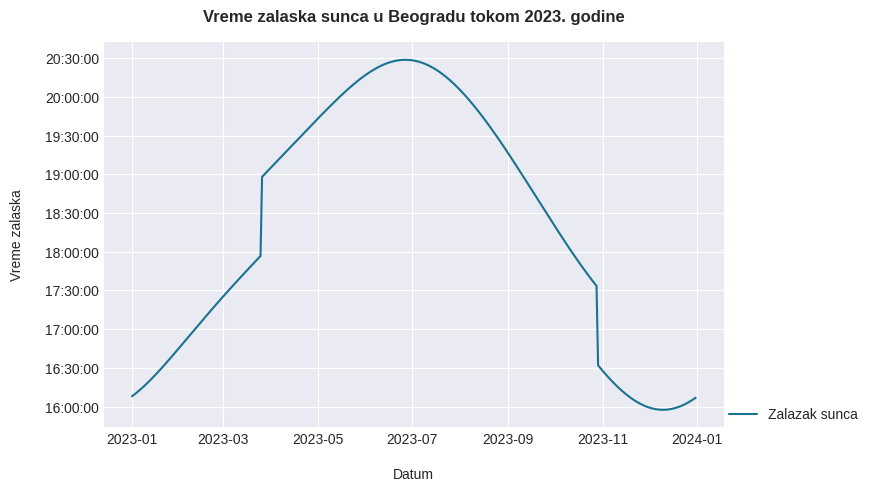

In [14]:
data, dates = prepare_data()

f = plt.figure(figsize= (8, 5)).subplots(1)
f.yaxis.set_major_formatter(mat_dates.DateFormatter("%H:%M:%S"))

f.plot(dates, data, label= 'Zalazak sunca', color= '#17738f')

plt.legend(loc= (1, 0))
plt.title('Vreme zalaska sunca u Beogradu tokom 2023. godine', pad= 15, fontweight= 'bold')
plt.xlabel('Datum', labelpad= 15)
plt.ylabel('Vreme zalaska', labelpad= 15)
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 3.</i></b></mark> 

Za posmatrača u Beogradu prikazati analemu (horizontske koordinate A i h) u toku godine ako je položaj
Sunca beležen svakog dana u 12h. Opciono označiti tačke ravnodnevnice, kratkodnevnice i dugodnevnice.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

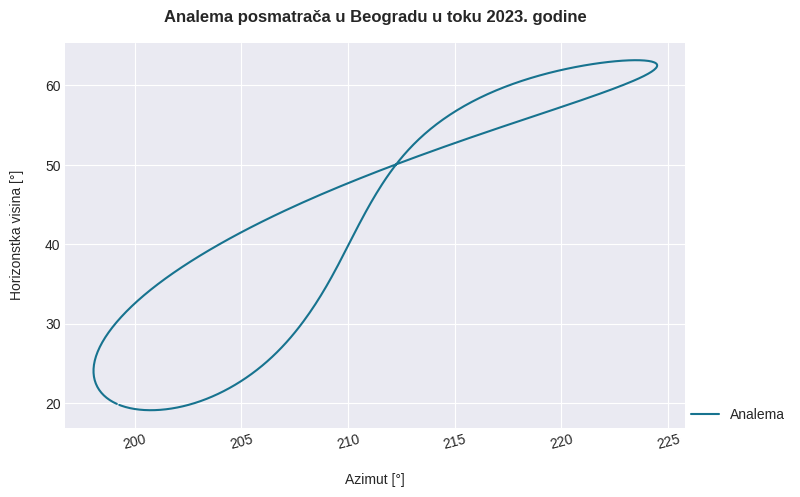

In [15]:
start_date = datetime.datetime(2023, 1, 1, 12, 0, 0)
end_date = start_date + datetime.timedelta(days= 365)
days = days_between(start_date, end_date)

A = []
h = []

for day in days:
    BG.date = day
    sun.compute(BG)
    
    A.append(np.rad2deg(sun.az))
    h.append(np.rad2deg(sun.alt))

plot = plt.figure(figsize= (8, 5)).subplots(1)
plt.title('Analema posmatrača u Beogradu u toku 2023. godine', pad= 15, fontweight= 'bold')
plot.plot(A, h, label= 'Analema', color= '#17738f')
plt.legend(loc= (1, 0))
plt.xlabel('Azimut [°]', labelpad= 15)
plt.ylabel('Horizonstka visina [°]', labelpad= 15)
plt.xticks(rotation= 15)
plt.show()

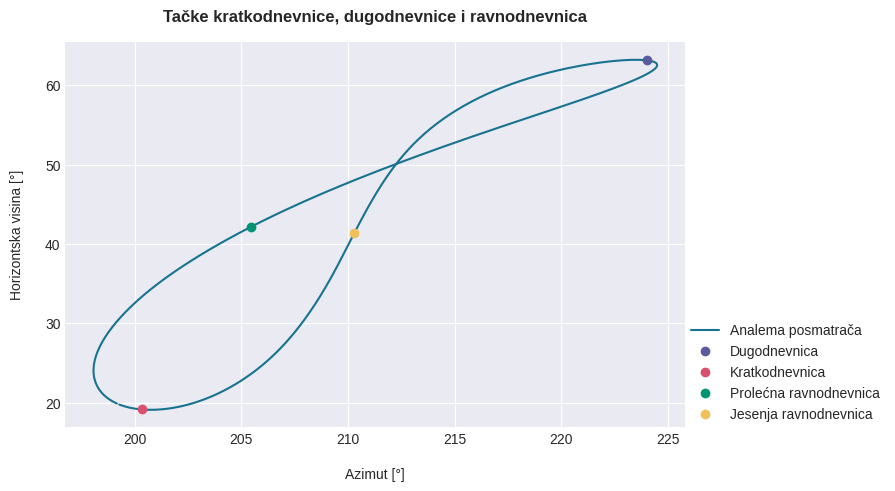

In [16]:
plot = plt.figure(figsize= (8, 5)).subplots(1)
plot.plot(A, h, label='Analema posmatrača', color= '#17738f')

dates = [datetime.datetime(2023, 6, 21, 12, 0, 0), datetime.datetime(2023, 12, 21, 12, 0, 0),\
        datetime.datetime(2023, 3, 20, 12, 0, 0), datetime.datetime(2023, 9, 22, 12, 0, 0)]

labels = ['Dugodnevnica', 'Kratkodnevnica', 'Prolećna ravnodnevnica', 'Jesenja ravnodnevnica']

for label, date in zip(labels, dates):
    BG.date = date
    sun.compute(BG)
    plot.plot(np.rad2deg(sun.az), np.rad2deg(sun.alt), 'o', label= label)

plt.legend(loc= (1, 0))
plt.title('Tačke kratkodnevnice, dugodnevnice i ravnodnevnica', pad= 15, fontweight= 'bold')
plt.xlabel('Azimut [°]', labelpad= 15)
plt.ylabel('Horizontska visina [°]', labelpad= 15)
plt.show()

### `Kretanje tela u Sunčevom sistemu i Keplerovi zakoni`

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Koristeci `pyephem` biblioteku prikazati prividna kretanja planeta u Sunčevom sistemu (Merkur - Neptun + Pluton) u toku narednih godinu dana (od datuma izrade vežbi) za posmatrača u Beogradu, ako su
položaji posmatrani svaki dan u isto vreme. Radi poređenja, prikazati uz to i kretanje Sunca za iste
trenutke. Prikazati opisana kretanja na dva zasebna grafika:
    
   - `a) u horizontskim koordinatama`;
   - `b) u nebeskim ekvatorskim koordinatama`.

Za svaki od grafika analizirati kretanja planeta, a potom ih med ̄usobno uporediti. Sta se zanimljivo uviđa
u oba slučaja? Prodiskutovati u nekoliko rečenica svoja zapažanja. (Primeri kretanja nekih nebeskih tela
su dati na slikama koje slede.)

<mark style="background-color: lightgreen"><b><i>Rešenje:</i></b></mark>

Uz korišćenje biblioteke `ephem` jednostavno možemo pronaći vrednosti koje su nam neophodne. Na prvom grafiku prikazujemo kretanje planeta predstavljeno preko horizontskih koordinata, za šta su nam neophodni azimut i visina, dok na drugom prikazujemo kretanje preko nebeskih ekvatorskih koordinata, za šta su nam neophodne rektascenzija i deklinacija.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

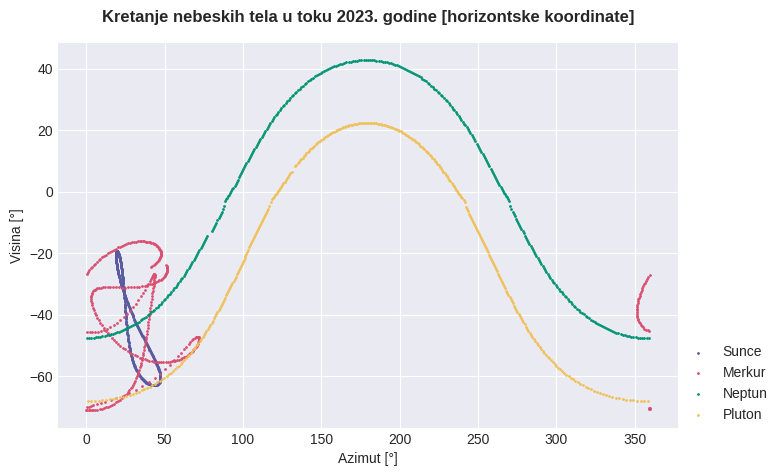

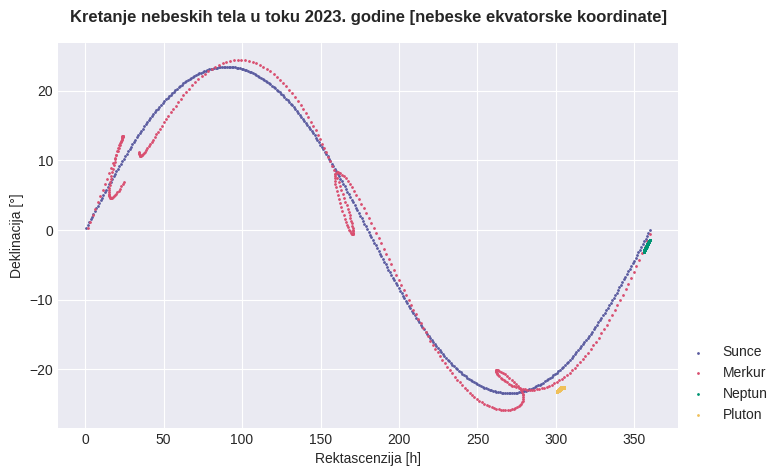

In [17]:
planets = [ephem.Sun(), ephem.Mercury(), ephem.Neptune(), ephem.Pluto()]
planet_names = ['Sunce', 'Merkur', 'Neptun', 'Pluton']

start_date = datetime.datetime(2023, 5, 14)
end_date = start_date + datetime.timedelta(days= 365)
days = days_between(start_date, end_date)

plt.figure(figsize= (8, 5))

for planet, planet_name in zip(planets, planet_names):
    h, A = [], []
    
    for day in days:
        BG.date = day
        planet.compute(BG)
        
        h.append(np.rad2deg(planet.alt))
        A.append(np.rad2deg(planet.az))
        
    plt.scatter(A, h, s= 1, label= planet_name)

plt.title('Kretanje nebeskih tela u toku 2023. godine [horizontske koordinate]', pad= 15, fontweight= 'bold')
plt.legend(loc= (1, 0))
plt.xlabel('Azimut [°]')
plt.ylabel('Visina [°]')
plt.show()
    
plt.figure(figsize= (8, 5))
for planet, planet_name in zip(planets, planet_names):
    rectascension, declination = [], []
    
    for day in days:
        BG.date = day
        planet.compute(BG)
        
        rectascension.append(np.rad2deg(planet.ra))
        declination.append(np.rad2deg(planet.dec))
    
    plt.scatter(rectascension, declination, s= 1, label= planet_name)
 

plt.title('Kretanje nebeskih tela u toku 2023. godine [nebeske ekvatorske koordinate]', pad= 15, fontweight= 'bold')   
plt.legend(loc= (1, 0))
plt.xlabel('Rektascenzija [h]')
plt.ylabel('Deklinacija [°]')
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark> 

Pronaći datume kada će se Mars u narednom periodu naći u perihelu i afelu i odštampati. Potom ove
položaje iskoristiti u cilju dokazivanja `II Keplerovog zakona`:
    $$ {r^2 {∆θ \over ∆t}} = const $$
    
gde je: <b>r</b> `rastojanje do perihela/afela`, a <b>∆θ</b> `ugaono rastojanje` između dva uzastopna položaja razdvojena
`periodom` <b>∆t</b>. Pokazati da će prebrisane površine vektora položaja Sunce-Mars u toku intervala vremena
(uzeti ∆t = 1 dan u okolini perihela i afela) biti jednake. Za to koristiti opcije `ephem.separation()`,
koje daje uglovno rastojanje i heliocentrične koordinate Marsa.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [18]:
from termcolor import cprint, colored

start_date = datetime.datetime(2023, 5, 14)
end_date = start_date + datetime.timedelta(days= 365)
days = days_between(start_date, end_date)

mars = ephem.Mars()
mars.compute()

af = (mars, mars.sun_distance, float('inf'))
per = (mars, mars.sun_distance, 0)

for day in days:
    mars.compute(day)
    delta = datetime.timedelta(days= 1)
    
    next_m = ephem.Mars(day + delta)
    diff = ephem.separation((mars.hlon, mars.hlat), (next_m.hlon, next_m.hlat))
    
    if next_m.sun_distance > af[1]:
        af = (day, next_m.sun_distance, diff / delta.total_seconds())
    if next_m.sun_distance < per[1]:
        per = (day, next_m.sun_distance, diff / delta.total_seconds())
        
fst_kepler = af[1] ** 2 * af[2]
snd_kepler = per[1] ** 2 * per[2]

cprint('\t\t\tRezultati', color= 'green', attrs= ['bold'])
cprint(f'------------------------------------------------------------', attrs= ['bold'])

text = colored(af[0], 'blue', attrs= ['bold'])
print(f'Datum kada će se Mars naći u afelu: {text}')
text = colored(per[0], 'blue', attrs= ['bold'])
print(f'Datum kada će se Mars naći u perihelu: {text}')

cprint(f'------------------------------------------------------------', attrs= ['bold'])
cprint(f'\t\tDokaz II Keplerovog zakona', color= 'green', attrs= ['bold'])
cprint(f'------------------------------------------------------------', attrs= ['bold'])
text = colored(f'\t{fst_kepler} == {snd_kepler}', 'magenta', attrs= ['bold'])
print(text)

			Rezultati
------------------------------------------------------------
Datum kada će se Mars naći u afelu: 2023-05-30 00:00:00
Datum kada će se Mars naći u perihelu: 2024-05-07 00:00:00
------------------------------------------------------------
		Dokaz II Keplerovog zakona
------------------------------------------------------------
	2.447053634840868e-07 == 2.4469547819052124e-07


<mark style="background-color: #f5695f"><b><i>Zadatak 3.</i></b></mark> 

Dati su podaci za nebeska tela Sunčevog sistema (u materijalima v5 podaci.dat).

<mark style="background-color: #ad48cf"><b>a)</b></mark> Napisati funkciju koja računa period revolucije po 3. Keplerovom zakonu:
    $$ {{a^3 \over T^2} = {GM \over 4\pi^2}} $$

Prikazati zavisnost perioda u odnosu na veliku poluosu u logaritamskoj skali. Šta očekujemo i da li se rezultat slaže sa očekivanjima?

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [19]:
import pandas as pd

# ! pip3 install astropy
import astropy.constants

data = pd.read_csv('data/v5_podaci.dat', sep= '\s+')
data

,planeta,velika_poluosa_au,masa_1e24kg,ekscentricitet
0,Merkur,0.3871,0.330,0.21
1,Venera,0.7233,4.870,0.01
2,Zemlja,1.0000,5.970,0.02
3,Mars,1.5237,0.642,0.09
4,Jupiter,5.2029,1898.000,0.05
5,Saturn,9.5370,568.000,0.05
6,Uran,19.1890,86.800,0.05
7,Neptun,30.0699,102.000,0.01
8,Pluton,39.4821,0.013,0.25


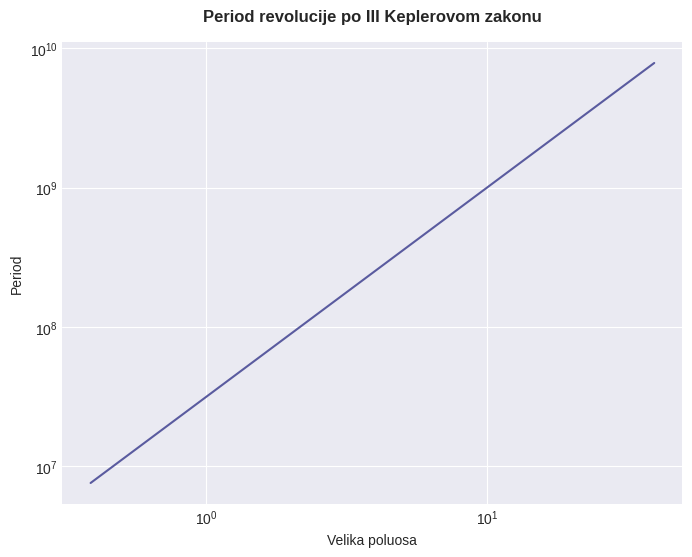

In [20]:
pi = math.pi
G = astropy.constants.G.value
M = astropy.constants.M_sun.value
au = astropy.constants.au.value

def revolution_period(a, m):
    return math.sqrt((a ** 3 * 4 * pi ** 2) / (G * (M + m)))

big_semi_axis = []
period = []

data = data.reset_index()

for _, planet in data.iterrows():
    big_semi_axis.append(planet['velika_poluosa_au'])
    period.append(revolution_period(planet['velika_poluosa_au'] * au, 0))

plt.figure(figsize= (8, 6))
plt.plot(big_semi_axis, period)

plt.xscale('log')
plt.yscale('log')

plt.title('Period revolucije po III Keplerovom zakonu', pad= 15, fontweight= 'bold')
plt.xlabel('Velika poluosa')
plt.ylabel('Period')
plt.show()

<mark style="background-color: #ad48cf"><b>b)</b></mark> Izmeniti funkciju u prvom delu zadatka tako da je 3. Keplerov zakon korigovan za masu planete.
Prikazati istu zavisnost. Da li se uočava neka razlika?

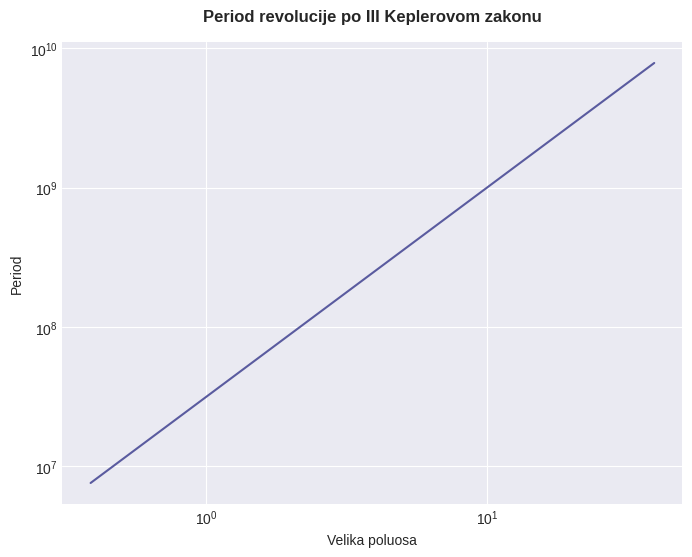

In [21]:
big_semi_axis = []
period = []

for _, planet in data.iterrows():
    big_semi_axis.append(planet['velika_poluosa_au'])
    period.append(revolution_period(planet['velika_poluosa_au'] * au, planet['masa_1e24kg']))

plt.figure(figsize= (8, 6))
plt.plot(big_semi_axis, period)

plt.xscale('log')
plt.yscale('log')

plt.title('Period revolucije po III Keplerovom zakonu', pad= 15, fontweight= 'bold')
plt.xlabel('Velika poluosa')
plt.ylabel('Period')
plt.show()

<mark style="background-color: #ad48cf"><b>c)</b></mark> Naći razliku u periodima dobijenih u prethodna dva primera i prikazati je u odnosu na masu planete u logaritamskoj skali. Šta se može zapaziti? Kod kojih planeta je ova razlika najveća, a kod kojih najmanja?

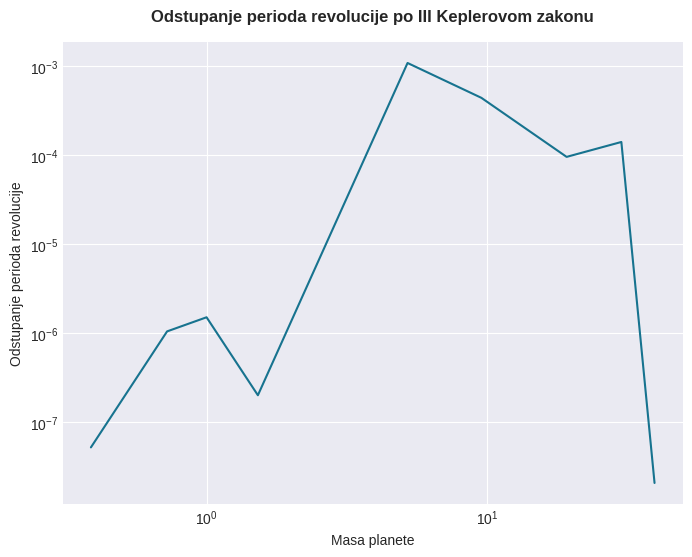

In [22]:
mass = []
deviation = []

for _, planet in data.iterrows():
    mass.append(planet['velika_poluosa_au'])
    
    period_without_planet_mass = revolution_period(planet['velika_poluosa_au'] * au, 0) / (86400 * 365)
    period_with_planet_mass = revolution_period(planet['velika_poluosa_au'] * au, planet['masa_1e24kg'] * 1e24) / (86400 * 365) 
    deviation.append((period_without_planet_mass - period_with_planet_mass) / planet['velika_poluosa_au'])
    
plt.figure(figsize= (8, 6))
plt.plot(mass, deviation, color= '#17738f')
plt.xscale('log')
plt.yscale('log')

plt.title('Odstupanje perioda revolucije po III Keplerovom zakonu', pad= 15, fontweight= 'bold')
plt.xlabel('Masa planete')
plt.ylabel('Odstupanje perioda revolucije')
plt.show()

### `Problem dva tela`

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Koristeci ephem biblioteku prikazati kretanja nebeskih tela u Sunčevom sistemu (planeta Merkur - Neptun + Pluton + Halejeva kometa) u toku narednih 300 godina (od datuma izrade vežbi) u odnosu na Sunce, ako su položaji posmatrani svaki dan u isto vreme. Kako se razlikuju putanje objekata?

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

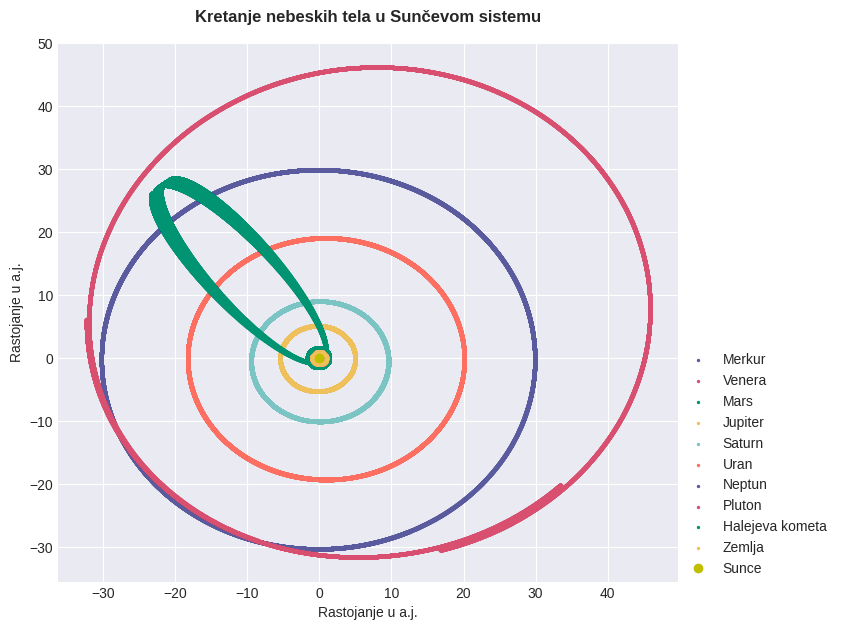

In [23]:
start_date = datetime.datetime(2023, 5, 19)
end_date = start_date + datetime.timedelta(days= 300 * 365)   # narednih 300 godina

planets = [ephem.Mercury(), ephem.Venus(), ephem.Mars(), ephem.Jupiter(), ephem.Saturn(), ephem.Uranus(), \
           ephem.Neptune(), ephem.Pluto(), ephem.readdb("1P/Halley,e,162.2239,58.9763,111.9047,17.872265,0.0130447,0.966321,171.4710,\
           02/10.0/2022,2000,g 4.0,6.0"), ephem.Sun()]

planet_names = ['Merkur', 'Venera', 'Mars', 'Jupiter', 'Saturn', 'Uran', 'Neptun', 'Pluton', \
                'Halejeva kometa', 'Zemlja']

sun = ephem.Sun()
plt.figure(figsize= (8, 7))

for planet, planet_name in zip(planets, planet_names):
    xs, ys = [], []
    
    for date in days_between(start_date, end_date):
        if planet_name != 'Zemlja':
            planet.compute(date)
            r = planet.sun_distance
            xs.append(r * math.cos(planet.hlon))
            ys.append(r * math.sin(planet.hlon))
        else:
            planet.compute(date)
            r = planet.earth_distance
            xs.append(r * math.cos(planet.hlon))
            ys.append(r * math.sin(planet.hlon))
            
    plt.scatter(xs, ys, s= 2, label = planet_name)
    
plt.plot(0, 0, 'yo', label= 'Sunce')

plt.title('Kretanje nebeskih tela u Sunčevom sistemu', pad= 15, fontweight= 'bold')
plt.xlabel('Rastojanje u a.j.')
plt.ylabel('Rastojanje u a.j.')
plt.legend(loc= (1, 0.0))
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark> 

Na osnovu jednačine za realtivno kretanje dva tela, koja je izvedena u sklopu probelma dva tela, odrediti
putanju proizvoljnog satelita oko Zemlje i prikazati. Od ulaznih podataka su potrebni početni položaj i početne brzine satelita koje zadajete prozivoljno, dok su masa Zemlje i gravitaciona konstanta poznati. U
ovom zadatku je potrebno da kositite funkciju scipy.integrate.odeint(f, pocetni uslovi, vreme, ...) koja će rešavati diferencijalne jednačine, pri čemu se funkcija f zasebno definiše. Putanju je potrebno prikazati na 3D grafiku. Primer jednog koda koji koristi pomenute opcije je dat u Dodatku. Na slici ispod je prikazan primer modifikovane orbite jednog satelita (GOES-16), a pretragom možete odabrati sličan.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [24]:
from scipy.integrate import odeint
import mpl_toolkits.mplot3d.axes3d as axes3d

# TODO

### `Zakoni zračenja i zvezde`

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Definisati `Plankovu funkciju` u zavisnosti od talasne dužine $I_{λ}(T)$. Konstante se mogu pozvati direktno iz `astropy.constants`. Na osnovu nje i generisanih podataka za interval talasnih dužina, prikazati raspodelu intenziteta zračenja Sunca u zavisnosti u talasne dužine u nanometrima. Potom odrediti i odštampati talasnu dužinu maksimalnog intenziteta Sunca. Kojoj boji odgovara ova talasna dužina?

<mark style="background-color: lightgreen"><b><i>Rešenje:</i></b></mark>

Formula koju koristimo (prezapisana tako da nemamo drugi množilac eksplicitno):

$$ I_{λ}(T) = {{{2 \pi hc^2 \over \lambda^5}} \over e^{hc \over \lambda kT} - 1} $$

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [25]:
# formula iz materijala sa vežbi

C = astropy.constants.c.value
h = astropy.constants.h.value
k = astropy.constants.k_B.value
pi = math.pi
e = math.e
T = 5800

def planks_constant(lam, T):
    return (2 * pi * h * C**2 / lam ** 5) / (e ** (h * C/ (lam * k * T)) - 1)

Maksimalnom intenzitetu Sunca (84452920857153.88 W/sm^3) odgovara talasna dužina od 500nm.


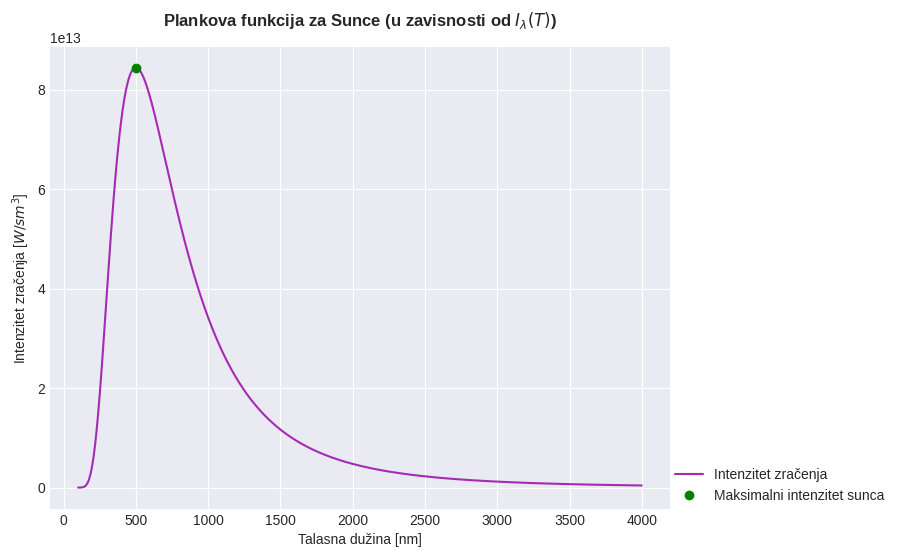

In [26]:
wave_lengths = range(100, 4000)
radience = []

max_intensity = (0, 0)

for wave_length in wave_lengths:
    radience.append(planks_constant(wave_length * 1e-9, T))
    
    if planks_constant(wave_length * 1e-9, T) > max_intensity[1]:
        max_intensity = (wave_length, planks_constant(wave_length * 1e-9, T))
    
print(f'Maksimalnom intenzitetu Sunca ({max_intensity[1]} W/sm^3) odgovara talasna dužina od {max_intensity[0]}nm.')

plt.figure(figsize= (8, 6))
plt.title('Plankova funkcija za Sunce (u zavisnosti od $I_{λ}(T)$)', pad= 15, fontweight= 'bold')
plt.xlabel('Talasna dužina [nm]')
plt.ylabel('Intenzitet zračenja [$W/sm^3}$]')

plt.plot(wave_lengths, radience, label= 'Intenzitet zračenja', color= '#a52bb3')
plt.plot(max_intensity[0], max_intensity[1], 'go', label= 'Maksimalni intenzitet sunca')

plt.legend(loc= (1, 0))
plt.show()

> Kako smo dobili da maksimalnom intenzitetu sunca odgovara talasna dužina od 500nm, možemo zaključiti da je to _zelena boja_ koja obuhvata opseg 495nm - 570nm.

<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark> 

Iskoristiti prikaz iz prethodnog zadatka i na isti grafik prikazati i `stvarni sunčev spektar` posmatran van Zemljine atmosfere čiji su podaci dati u `sun.txt`. Zbog čega se kod ove dve raspodele uočavaju razlike?

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [27]:
data = pd.read_csv('data/sun.txt', sep= '\s+')
data.head()

,lambda(m),intenzitet(W/m^3)
0,5.000000e-10,5.169493e+07
1,1.500000e-09,9.617081e+08
2,2.500000e-09,6.886413e+08
3,3.500000e-09,3.506779e+08
4,4.500000e-09,9.013828e+08


/tmp/ipykernel_8862/1235521071.py:11: RuntimeWarning: overflow encountered in scalar power
  return (2 * pi * h * C**2 / lam ** 5) / (e ** (h * C/ (lam * k * T)) - 1)


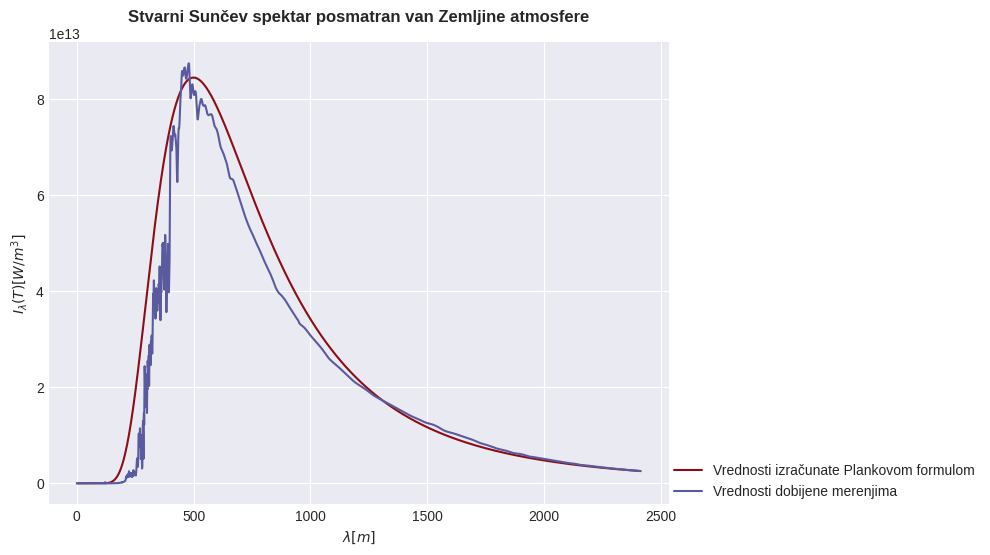

In [28]:
# FIX
wave_lengths = []
real_values = []
calculated_values = []

T = 5800
data = data.reset_index()
for _, row in data.iterrows():
    wave_lengths.append(row['lambda(m)'] * 1e9)
    real_values.append(planks_constant(row['lambda(m)'], T))
    calculated_values.append(row['intenzitet(W/m^3)'])

plt.figure(figsize= (8, 6))
plt.plot(wave_lengths, real_values, label= 'Vrednosti izračunate Plankovom formulom', color= '#8c0e14')
plt.plot(wave_lengths, calculated_values, label= 'Vrednosti dobijene merenjima')

plt.title('Stvarni Sunčev spektar posmatran van Zemljine atmosfere', pad= 15, fontweight= 'bold')
plt.xlabel('$\lambda [m]$')
plt.ylabel('$I_{\lambda}(T) [W/m^3]$')
plt.legend(loc= (1, 0))
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 3.</i></b></mark> 

Na osnovu podataka iz prvog zadatka i pomoću Stefan-Bolcmanovog zakona odrediti i odštampati luminoznost Sunca.

<mark style="background-color: lightgreen"><b><i>Rešenje:</i></b></mark>

Formule koje koristimo:

$$ F = \sigma T^4 $$
$$ L = 4 \pi r^2 \sigma T^4 $$

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [29]:
sigma = astropy.constants.sigma_sb.value
R = 696340000

def stefan_boltzmann(T):
    return sigma * T ** 4

def sun_luminosity(r, T):
    return 4 * math.pi * r ** 2 * sigma * T ** 4

In [30]:
print(f'Luminoznost sunca iznosi {sun_luminosity(R, T)}')

Luminoznost sunca iznosi 3.909995532956335e+26


<mark style="background-color: #f5695f"><b><i>Zadatak 4.</i></b></mark> 

Prikazati `Plankovu funkciju` u zavisnosti of talasne dužune $I_{λ}(T)$ za sledeće temperature zvezda: `15000K`, `7000K` i `3000K`. Odrediti i odštampati talasnu dužinu maksimalnog intenziteta za svaku od ovih zvezda i napisati kojem domenu elektromagnetnog zračenja pripadaju. Odrediti i luminoznost svake od njih pomoću Stefan-Bolcmanovog zakona. Kako se menja količina i zračenje energije za ove zvezde?

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [31]:
def electromagnetic_domain(wave_length):
    if wave_length > 1e3:
        return f'Radio talas: {(wave_length):1e}nm'
    elif wave_length > 1e-2:
        return f'Mikrotalas: {(wave_length):1e}nm'
    elif wave_length > 1e-5:
        return f'Infracrveni talas: {(wave_length):1e}nm'
    elif wave_length > 0.5 * 1e-6:
        return f'Vidljiva svetlost: {(wave_length):1e}nm'
    elif wave_length > 1e-8:
        return f'Ultraljubičasto zračenje: {(wave_length):1e}nm'
    elif wave_length > 1e-10:
        return f'X-zrak: {(wave_length):1e}nm'
    else:
        return f'Gama zrak: {(wave_length):1e}nm'

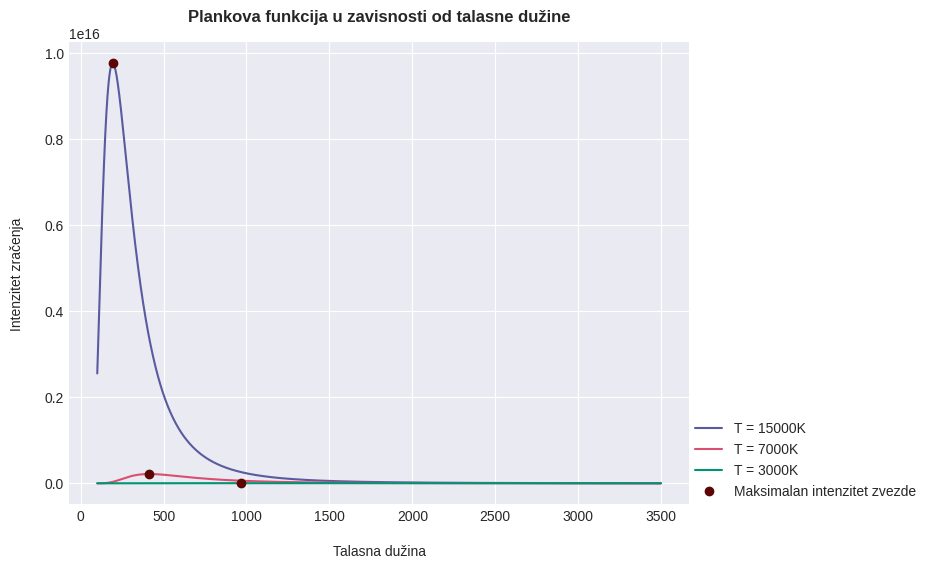

In [32]:
wave_lengths = range(100, 3500)
stars = list(zip([15000, 7000, 3000], [[0, 0], [0, 0], [0, 0]], [[], [], []]))

plt.figure(figsize= (8, 6))
for star in stars:
    for wave_length in wave_lengths:
        star[2].append(planks_constant(wave_length * 1e-9, star[0]))
        
        if star[2][-1] > star[1][1]:
            star[1][0], star[1][1] = wave_length, star[2][-1]

for _, star in enumerate(stars, start= 1):
    plt.plot(wave_lengths, star[2], label= f'T = {star[0]}K')
    if star == stars[-1]:
        plt.plot(star[1][0], star[1][1], 'o', color='#5c0505', label= 'Maksimalan intenzitet zvezde')
    else:
        plt.plot(star[1][0], star[1][1], 'o', color='#5c0505')

plt.title('Plankova funkcija u zavisnosti od talasne dužine', pad= 15, fontweight= 'bold')
plt.legend(loc= (1, 0))
plt.xlabel('Talasna dužina', labelpad= 15)
plt.ylabel('Intenzitet zračenja', labelpad= 15)
plt.show()

> Sa priloženog grafika se može primetiti da za zvezdu koja ima najveću temperaturu intenzitet zračenja naglo opada nakon dostizanja maksimalne vrednosti, a sa porastom talasne dužine, dok je za ostale on manje-više svuda jednak (za zvezdu sa temperaturom 3000K je konstantan).

In [33]:
cprint(f'\t\t\tInformacije o zvezdama\n', 'green', attrs= ['bold'])
for star in stars:
    cprint(f'{electromagnetic_domain(C / star[1][1])}', 'blue', attrs= ['bold'])
    print(f'Temperatura zvezde: {star[0]}K\nTalasna dužina: {star[1][0]}nm, količina zračenja: {star[1][1]}W/sm^3')
    print(f'Stefan-Bolzmann: {stefan_boltzmann(star[0])}')
    cprint('-------------------------------------------------------------------------', attrs= ['bold'])

			Informacije o zvezdama

Ultraljubičasto zračenje: 3.068245e-08nm
Temperatura zvezde: 15000K
Talasna dužina: 193nm, količina zračenja: 9770812080657896.0W/sm^3
Stefan-Bolzmann: 2870627049.7121186
-------------------------------------------------------------------------
Vidljiva svetlost: 1.386293e-06nm
Temperatura zvezde: 7000K
Talasna dužina: 414nm, količina zračenja: 216254682107156.5W/sm^3
Stefan-Bolzmann: 136145689.8046182
-------------------------------------------------------------------------
Infracrveni talas: 9.588245e-05nm
Temperatura zvezde: 3000K
Talasna dužina: 966nm, količina zračenja: 3126666731245.2583W/sm^3
Stefan-Bolzmann: 4593003.27953939
-------------------------------------------------------------------------


<mark style="background-color: #f5695f"><b><i>Zadatak 5.</i></b></mark> 

Učitati podatke iz `stars.txt` i pomoću njih odrediti `luminoznosti` za sve zvezde. Prikazati grafik zavisnosti logaritma luminoznosti od temperature. Uz to, podesiti osu temperature tako da je se smanjuje duž x-ose
(plt.gca().invert xaxis()) i definisati tako da se boje tačaka menjaju u zavisnosti od temperature: manje temperature - crvenije, a veće - plavlje (korsititi opciju cm (colormaps) iz matplotlib biblioteke).
U kojim regionima ili granama se zvezde nagomilavaju, a u kojima ih uopšte nema? Uporediti sa HR dijagramom: kojih tipova zvezda ima najviše među najsjajnijim?

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [34]:
data = pd.read_csv('data/stars.txt', sep= '\s+')
data.head()

# podaci su učitani ovako zbog lepšeg ispisa :)

,ime_zvezde,poluprecnik(Rsun),temperatura(K)
0,Sunce,1.0,5800
1,Arcturus,25.4,4300
2,Altair,1.8,7700
3,Sirius,1711.0,9940
4,Canopus,75.0,7400


In [35]:
luminosity = []
for index, star in data.iterrows():
    luminosity.append(sun_luminosity(star['poluprecnik(Rsun)'] * R, star['temperatura(K)']))

data['luminoznost'] = luminosity

In [36]:
data.head()

,ime_zvezde,poluprecnik(Rsun),temperatura(K),luminoznost
0,Sunce,1.0,5800,3.909996e+26
1,Arcturus,25.4,4300,7.620887e+28
2,Altair,1.8,7700,3.935249e+27
3,Sirius,1711.0,9940,9.874380e+33
4,Canopus,75.0,7400,5.827921e+30


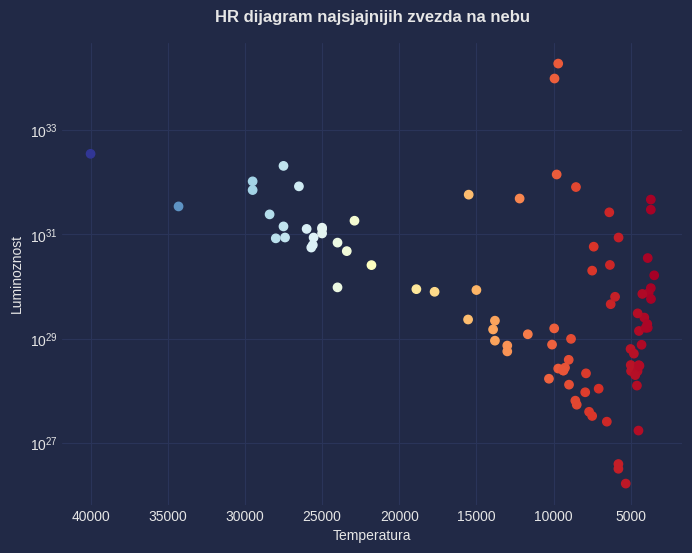

In [37]:
temperature = list(data['temperatura(K)'])

# da bi se bolje videle boje
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize= (8, 6))
plt.scatter(temperature, luminosity, c= temperature, cmap= 'RdYlBu')
plt.title('HR dijagram najsjajnijih zvezda na nebu', pad= 15, fontweight= 'bold')
plt.xlabel('Temperatura')
plt.ylabel('Luminoznost')
plt.yscale('log')
plt.gca().invert_xaxis()

In [38]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

### `Magnitude i SQL pretraga`

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Na grafiku predstaviti prvih 100 zvezda koje zadovoljavaju uslove:
- `185 < ra < 185.1` 
- `15 < dec < 15.1`

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

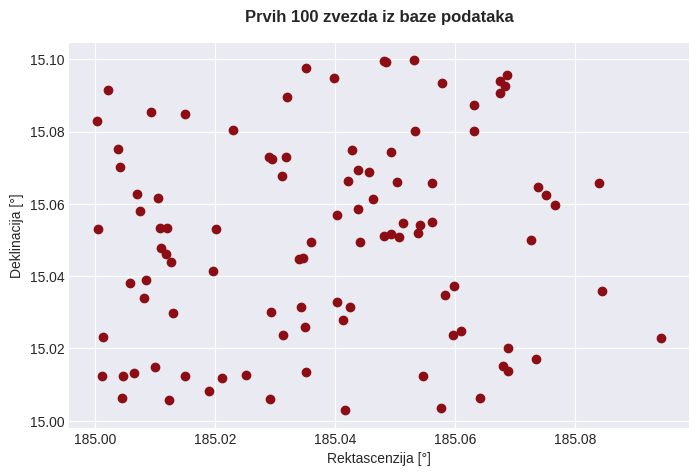

In [39]:
from astroquery.sdss import SDSS

query = '''
    SELECT TOP 100 objID, ra, dec
    FROM PhotoPrimary
    WHERE ra > 185 AND ra < 185.1 AND   
          dec > 15 AND dec < 15.1
    ORDER BY objID
'''

result = SDSS.query_sql(query)

plt.figure(figsize= (8, 5))
plt.title('Prvih 100 zvezda iz baze podataka', pad= 15, fontweight= 'bold')
plt.xlabel('Rektascenzija [°]')
plt.ylabel('Deklinacija [°]')
plt.scatter(result['ra'], result['dec'], color= '#8c0e14')
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark> 

Na grafiku predstaviti broj zvezda koje se nalaze na kružnom isečku radijusa od 1 minuta, pri čemu je centar kružnice u <b>ra = 185°</b> i <b>dec = -0.5°</b>.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [40]:
query = '''
    SELECT G.objID, GN.distance
    FROM Galaxy AS G JOIN dbo.fGetNearbyObjEq(185.,-0.5, 1) AS GN
        ON G.objID = GN.objID
    ORDER BY distance 
'''

result = SDSS.query_sql(query)
result

objID,distance
int64,float64
1237648720696050283,0.0894709670336179
1237648720696050558,0.281573936477415
1237648720696050289,0.306782942194111
1237648720696050018,0.322028520312689
1237648720696050274,0.393585097460738
1237648720696050693,0.467376201899867
...,...
1237648720696050542,0.7445059143086
1237648720696050570,0.774360441664586


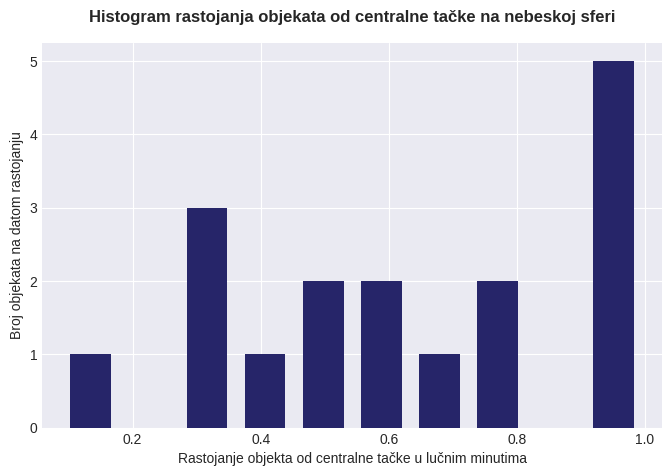

In [41]:
plt.figure(figsize= (8, 5))
plt.hist(result[1][:], color= '#262569', rwidth= 0.7)
plt.title('Histogram rastojanja objekata od centralne tačke na nebeskoj sferi', pad= 15, fontweight= 'bold')
plt.xlabel('Rastojanje objekta od centralne tačke u lučnim minutima')
plt.ylabel('Broj objekata na datom rastojanju')
plt.show()

<mark style="background-color: #f5695f"><b><i>Zadatak 3.</i></b></mark> 

Napisati SQL upit koji pronalazi <b>ID</b>, kao i <b>magnitude g i r</b> za jedno od odabranih jata (neophodni podaci mogu se pronaći u tabelama Star i PhotoObj). Koristeći podathe za <b>rektascenziju, deklinaciju</b> (koje treba pretvoriti u stepene) i radijus, iskoristiti funkciju iz 2. zadatka sa odogovarajućim vrednostima za jato. Naravno, neophodno je povezati tabelu sa funkcijom na već poznat način. Nakon toga, dodati još i uslove da su magnitude ograničene:
- `14 < g < 24`
- `14 < r < 24`

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

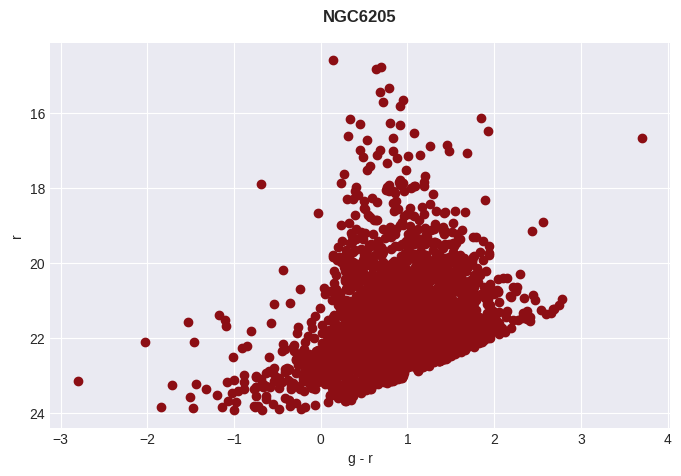

In [42]:
query = '''
    SELECT G.objID, GN.distance, P.g, P.r
    FROM Galaxy as G JOIN PhotoPrimary as P 
        ON G.objID = P.objID
            JOIN dbo.fGetNearbyObjEq(240.694722, 36.46, 17) AS GN
                ON GN.objID = P.objID
    WHERE P.g > 14 AND P.g < 24 AND P.r > 14 AND P.r < 24
    ORDER BY distance
'''

result = SDSS.query_sql(query)

diff = []
for r, g in zip(list(result['r']), list(result['g'])):
    diff.append(g - r)

plt.figure(figsize= (8, 5))
plt.title('NGC6205', pad= 15, fontweight= 'bold')

plt.xlabel('g - r')
plt.ylabel('r')
plt.scatter(diff, result['r'], color= '#8c0e14')
plt.gca().invert_yaxis()
plt.show()

### `Određivanje rastojanja`

<mark style="background-color: #f5695f"><b><i>Zadatak 1.</i></b></mark> 

Napisati SQL upit koji pronalazi <b>ID</b>, kao i <b>magnitude g i r</b> za jedno od odabranih jata (neophodni podaci mogu se pronaći u tabelama Star i PhotoObj). Koristeći podathe za <b>rektascenziju, deklinaciju</b> (koje treba pretvoriti u stepene) i radijus, iskoristiti funkciju iz 2. zadatka sa odogovarajućim vrednostima za jato. Naravno, neophodno je povezati tabelu sa funkcijom na već poznat način.

Dodati onu vrednost na prividnu magnitudu (y-osa) izohrone tako da ona odgovara podacima. Izvesti relaciju za <b>d[pc]</b> preko µ i potom proceniti rastojanje do jata.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

In [43]:
data = pd.read_csv('data/NGC6205.txt', sep= '\s+')
data.head()

,#EEP,M/Mo,LogTeff,LogG,LogL/Lo,sdss_u,sdss_g,sdss_r,sdss_i,sdss_z
0,12,0.110099,3.5354,5.3344,-2.7600,17.8610,14.1306,12.4496,11.6434,11.2132
1,13,0.121535,3.5417,5.2837,-2.6407,17.2999,13.7343,12.0867,11.3298,10.9188
2,14,0.135386,3.5487,5.2320,-2.5144,16.7200,13.3153,11.7058,10.9968,10.6063
3,15,0.151964,3.5561,5.1861,-2.3891,16.1537,12.8977,11.3300,10.6652,10.2955
4,16,0.169215,3.5629,5.1518,-2.2809,15.6676,12.5346,11.0073,10.3786,10.0271


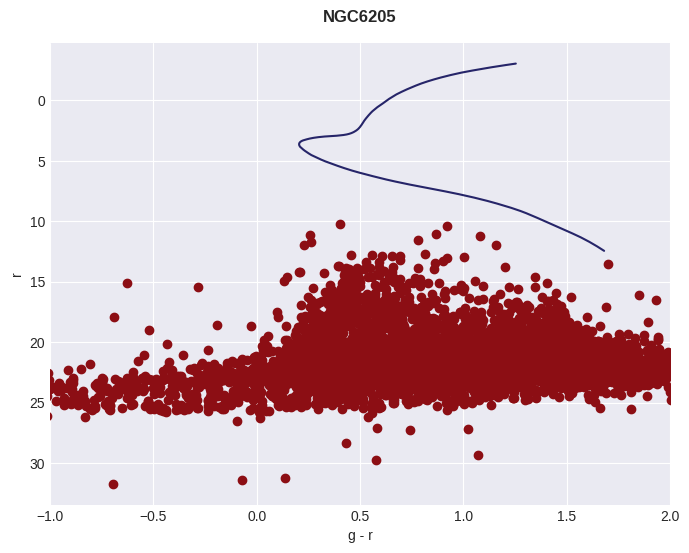

In [44]:
query = '''
    SELECT DISTINCT GN.distance, P.g, P.r
    FROM PhotoPrimary as P 
            JOIN dbo.fGetNearbyObjEq(240.694722, 36.46, 17) AS GN
                ON GN.objID = P.objID
    ORDER BY GN.distance
''' 

result = SDSS.query_sql(query)

diff1 = []
diff2 = []

for r, g in zip(list(result['r']), list(result['g'])):
    diff1.append(g - r)
    
for g, r in zip(list(data['sdss_g']), list(data['sdss_r'])):
    diff2.append(g - r)

plt.figure(figsize= (8, 6))
plt.title('NGC6205', pad= 15, fontweight= 'bold')

plt.xlabel('g - r')
plt.ylabel('r')
plt.scatter(diff1, result['r'], color= '#8c0e14')
plt.plot(diff2, list(data['sdss_r']), color= '#262569')
plt.xlim(-1.0, 2.0)
plt.gca().invert_yaxis()
plt.show()

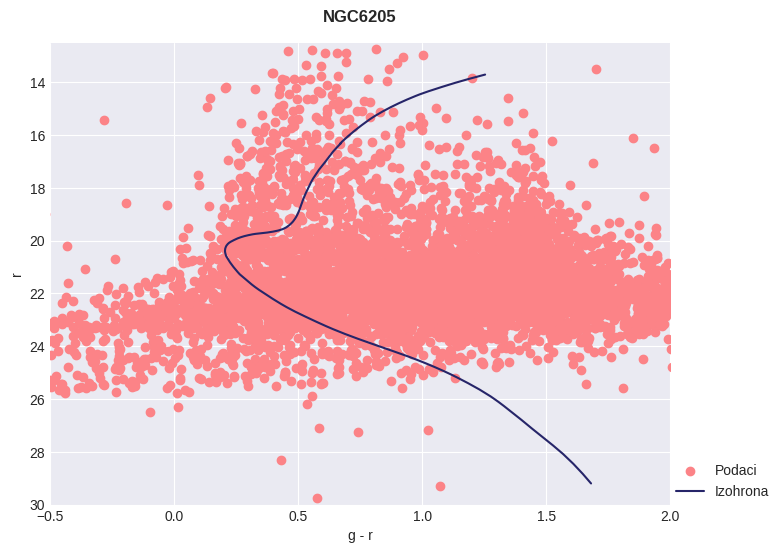

In [45]:
query = '''
    SELECT DISTINCT GN.distance, P.g, P.r
    FROM PhotoPrimary as P 
            JOIN dbo.fGetNearbyObjEq(240.694722, 36.46, 17) AS GN
                ON GN.objID = P.objID
    ORDER BY GN.distance
''' 

result = SDSS.query_sql(query)

diff1 = []

for r, g in zip(list(result['r']), list(result['g'])):
    diff1.append(g - r)
    
gs, rs = [], []
for g, r in zip(list(data['sdss_g']), list(data['sdss_r'])):
    gs.append(g - r)
    rs.append(r + 16.75)
        
plt.figure(figsize= (8, 6))
plt.title('NGC6205', pad= 15, fontweight= 'bold')
plt.scatter(diff1, result['r'], color= '#fc8387', label= 'Podaci')
plt.plot(gs, rs, color= '#262569', label= 'Izohrona')
plt.legend(loc= (1, 0))

plt.xlim(-0.5, 2.0)
plt.ylim(12.5, 30.0)
plt.xlabel('g - r')
plt.ylabel('r')
plt.gca().invert_yaxis()
plt.show()

In [46]:
def distance_formula(mi):
    return 10 ** (1 + mi / 5)

print(distance_formula(15.4321))

12201.690365988017


<mark style="background-color: #f5695f"><b><i>Zadatak 2.</i></b></mark>

Preko SQL-a dohvatiti podatke nephodne za računanje <b>brzina i rastojanja</b>. U Schema Browser-u među podacima za pregled (View) Galaxy se mogu naći prividne magnitude, a mi ćemo za ovu vežbu koristiti magnitudu <b>g</b>. Kako ovaj pregled ne sadrži podatke o crvenim pomacima, moramo da je spojimo sa tabelom SpecObj i iz nje pribavimo podatak <b>z</b>. Pored toga, dodaćemo i uslove:
- `0,001 < z < 1` 
- `g < 22`

Prikazati grafik zavisnosti crvenog pomaka od magnitude.

Prikazati zavisnost <b>brzine</b> udaljavanja galaksije od njenog <b>rastojanja</b>, kao i <b>Habov zakon</b> koji ih povezuje.

<mark style="background-color: #589fbf"><b><i>Kod:</i></b></mark>

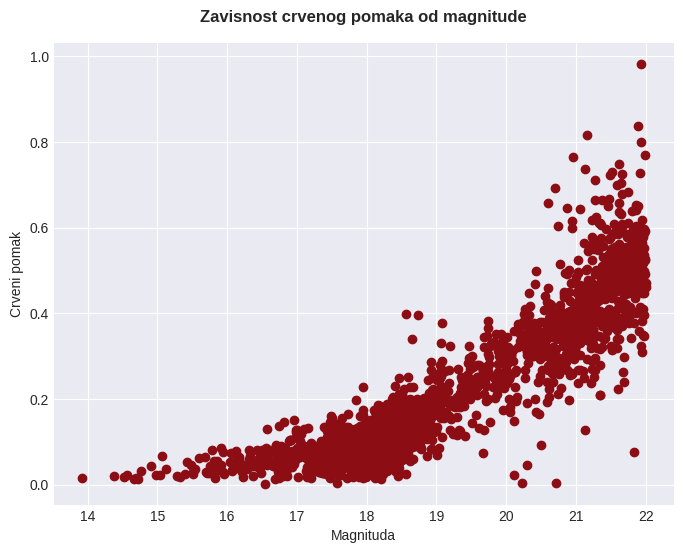

In [47]:
query = '''
    SELECT TOP 2000 G.g, SO.z
    FROM Galaxy G JOIN SpecObj SO
        ON G.objID = SO.bestObjID 
    WHERE SO.z > 0.001 AND SO.z < 1 AND G.g < 22
'''

result = SDSS.query_sql(query)

plt.figure(figsize= (8, 6))
plt.scatter(result['g'], result['z'], color= '#8c0e14')
plt.xlabel('Magnituda')
plt.ylabel('Crveni pomak')
plt.title('Zavisnost crvenog pomaka od magnitude', pad= 15, fontweight= 'bold')
plt.show()

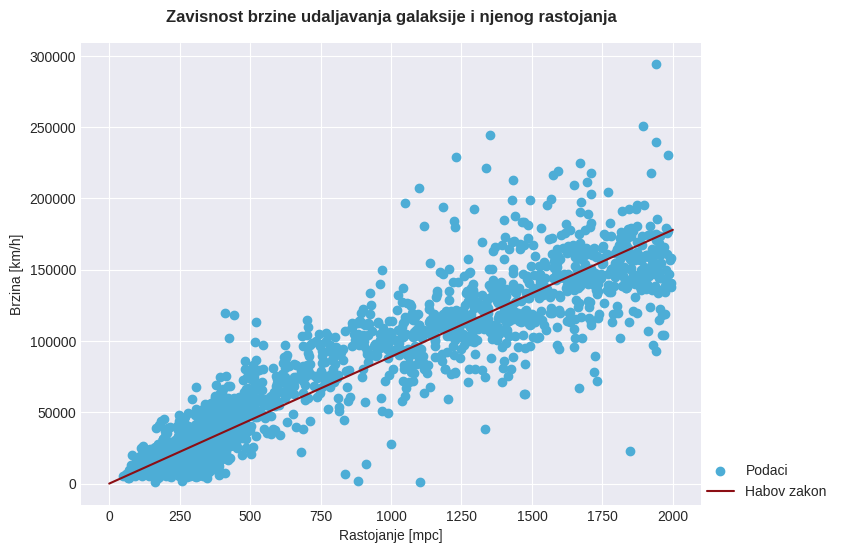

In [48]:
from scipy.optimize import curve_fit 

M = -19.5

def velocity(z):
    return C * z

def distance(g):
    return 10 ** (1 + (g - M) / 5)

velocities, distances = [], []
for g, z in zip(result['g'], result['z']):
    velocities.append(velocity(z) / 1000)
    distances.append(distance(g) / 1000000)

H0, _ = curve_fit(lambda x, y: x * y, distances, velocities)

plt.figure(figsize= (8, 6))
plt.scatter(distances, velocities, color= '#4dadd6', label= 'Podaci')
plt.plot([0, 2000], [0, 2000 * H0[0]], color= '#8c0e14', label= 'Habov zakon')

plt.title('Zavisnost brzine udaljavanja galaksije i njenog rastojanja', pad= 15, fontweight= 'heavy')
plt.xlabel('Rastojanje [mpc]')
plt.ylabel('Brzina [km/h]')
plt.legend(loc= (1, 0))
plt.show()